<a href="https://colab.research.google.com/github/Martinccv/Clases-DS/blob/main/Primera_Entrega_Grupo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primer entrega

Llegamos al final del primer sprint y estamos en condiciones de analizar un dataset, entrenar un primer modelo (de regresión o clasificación) y evaluar resultados.

En este proyecto, trabajaremos con un dataset que contiene información sobre personas. La idea es predecir si la persona tiene un salario anual mayor a 50K dólares.

### Consignas:

A diferencia de los trabajos que venimos haciendo en clases, en los cuáles nos íbamos guiando por consignas o tips en un notebook, en este caso les toca a ustedes definir qué análisis les parece necesario hacer, qué algoritmo utilizar y qué métrica medir (justificando por qué).

La idea es que el notebook sea una especie de "informe" en el que ustedes puedan explicar de forma simple a una persona cualquiera lo que hicieron. Aprovechen las celdas de texto y agreguen los gráficos que les parezca necesarios. Como primer paso, deben identificar si se trata de un problema de regresión o clasificación, hacer un análisis exploratorio de los datos (presentando conclusiones siempre) y finalmente entrenar un modelo para generar sus predicciones.

Si les es útil, pueden agregar datos de otras fuentes (por ejemplo datasets públicos del país, o lo que sea) siempre justificando sus decisiones.

Son libres de probar cualquiera de los modelos que vimos, pueden dejar los resultados de todo lo que prueben con sus correspondientes conclusiones para mostrar cómo llegan al resultado final.

Se les entrega 3 archivos:
- train.csv: Es el dataset que utilizarán para entrenar su modelo. Contiene features y el target
- test.csv: Este archivo, contiene únicamente features (incluyendo el ID de la persona). Ustedes deben predecir el target para todas estas personas y armar un archivo que contenga las columnas ID, PRED
- submit_example.csv: El archivo que entreguen tiene que tener exactamente este formato, pero con sus predicciones. Es decir, tiene que contener las columnas ID (que se corresponde al ID de la persona en el set test.csv) y PRED (que toma los valores 1 y 0. 1 significa que la persona gana más de 50K y 0 significa que no).

Deben entregar:
- Notebook con análisis e implementación del modelo predictivo
- Archivo en formato csv con las predicciones para el set de test.

## A tener en cuenta

- En la columna workclass van a ver los valores: 'Self-emp-not-inc' y 'Self-emp-inc' [acá](https://smallbiztrends.com/2013/11/incorporated-versus-unincorporated-self-employment.html) pueden encontrar info sobre su significado.
- Con pandas tienen la función to_csv que les permite exportar un dataframe a csv. Recuerden que tienen que especificar en el parámetro index, que no quieren que el index quede en el archivo csv.

## Archivos

Los archivos necesarios pueden descargarlos de los siguientes links:

- [train.csv](https://drive.google.com/file/d/1fpy7JaVdFlFPHa3kWKmem_E4O7NqhBax/view?usp=sharing)
- [test.csv](https://drive.google.com/file/d/1z927EgBNSOJ3iWorIGz2XEjlrfD0Koaw/view?usp=sharing)
- [submit_example.csv](https://drive.google.com/file/d/1JAdndD1u1F2_TzM-uhArTWW7eepupmuZ/view?usp=sharing)

## Fecha de entrega

La entrega se tiene que subir al aula virtual

1 entrega por grupo.

Por favor indicar el nombre de todos los integrantes en el mail o al comienzo del notebook.

Fecha limite: A definir en las proximas clases

# 1- Importamos las librerias que vamos a utilizar en nuestro modelo

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2- Cargamos los archivos al entorno y les asignamos un valor

In [ ]:
# Cargar datos
train = pd.read_csv('/content/train.csv')
testeo= pd.read_csv('/content/test.csv')
submit = pd.read_csv('/content/submit_example.csv')

In [ ]:
train

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,<=50K,24451
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,>50K,985
2,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,>50K,30229
3,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,7107
4,27656,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K,27639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27651,29823,31,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K,29802
27652,5390,51,Private,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K,5390
27653,860,55,Federal-gov,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,1887,40,United-States,>50K,860
27654,15800,23,Private,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,25,United-States,<=50K,15795


In [ ]:
testeo

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,ID
0,3643,53,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3137,0,40,United-States,3643
1,16041,18,?,11th,7,Never-married,?,Own-child,White,Male,0,0,25,United-States,16036
2,9403,42,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,37,United-States,9401
3,17909,49,Self-emp-inc,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,60,United-States,17903
4,5198,58,Local-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,5198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4876,19475,50,Private,HS-grad,9,Divorced,Craft-repair,Unmarried,White,Female,0,0,40,United-States,19468
4877,7554,43,State-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,7554
4878,25091,71,Private,Assoc-voc,11,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,25076
4879,9733,20,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,Yugoslavia,9731


In [ ]:
submit

,ID,PRED
0,3643,1
1,16036,1
2,9401,1
3,17903,1
4,5198,1
...,...,...
4876,19468,1
4877,7554,1
4878,25076,1
4879,9731,1


# 3- Analizamos el dataframe train y revisamos si tienen valores nulos

In [ ]:
# Vista previa de los datos
print(train.head())
print(train.info())
print(train.describe())


   index  age  workclass  education  education.num      marital.status  \
0  24466   30  Local-gov    HS-grad              9            Divorced   
1    985   37    Private  Bachelors             13  Married-civ-spouse   
2  30250   41    Private    HS-grad              9  Married-civ-spouse   
3   7107   45    Private  Bachelors             13  Married-civ-spouse   
4  27656   28    Private    HS-grad              9       Never-married   

        occupation   relationship   race     sex  capital.gain  capital.loss  \
0  Protective-serv      Own-child  White  Female             0             0   
1  Exec-managerial           Wife  White  Female             0          1848   
2     Craft-repair        Husband  White    Male             0             0   
3   Prof-specialty        Husband  White    Male             0             0   
4  Exec-managerial  Not-in-family  White  Female             0             0   

   hours.per.week native.country income     ID  
0              32  United

In [ ]:
# Verificar valores nulos
print(train.isna().sum())

index             0
age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
ID                0
dtype: int64


In [ ]:
#Verificamos la forma de los dataframes
train.shape

(27656, 16)

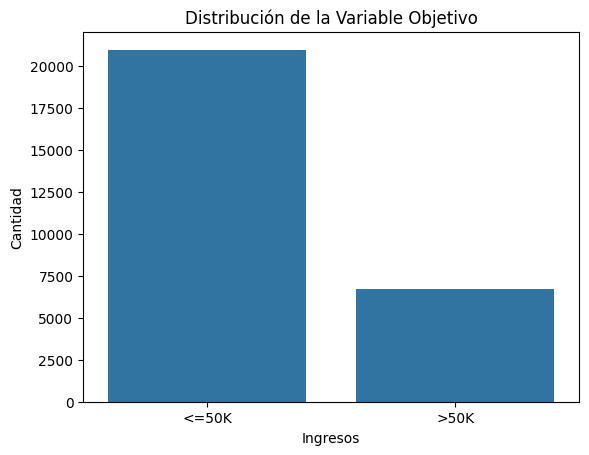

In [ ]:
# Distribución de la variable objetivo
sns.countplot(x="income", data=train)
plt.xlabel('Ingresos')
plt.ylabel('Cantidad')
plt.title('Distribución de la Variable Objetivo')
plt.show()

In [ ]:
# Vemos el porcentaje de valores entre ingresos menores o iguales a 50K y mayores a 50K
train["income"].value_counts(normalize=1)*100

income
<=50K    75.762945
>50K     24.237055
Name: proportion, dtype: float64

# 4- Verificamos que columnas contienen variables categóricas y cuales son numéricas

In [ ]:
# VARIABLES CATEGÓRICAS
train.select_dtypes(exclude=np.number).columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [ ]:
# VARIABLES NUMÉRICAS
train.select_dtypes(include=np.number).columns

Index(['index', 'age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'ID'],
      dtype='object')

# 5- Verificamos en cada columna, los datos y sus cantidades

In [ ]:
train["hours.per.week"].value_counts()

hours.per.week
40    12885
50     2432
45     1558
60     1245
35     1103
      ...  
92        1
89        1
87        1
94        1
95        1
Name: count, Length: 94, dtype: int64

In [ ]:
train["hours.per.week"].value_counts(normalize=1).tail(30)*100

hours.per.week
19    0.043390
68    0.039774
64    0.039774
11    0.039774
51    0.039774
85    0.036159
98    0.036159
63    0.028927
29    0.025311
96    0.018079
77    0.018079
78    0.018079
59    0.014463
31    0.014463
67    0.010848
81    0.007232
97    0.007232
86    0.007232
76    0.007232
88    0.007232
91    0.007232
61    0.007232
73    0.007232
82    0.003616
74    0.003616
92    0.003616
89    0.003616
87    0.003616
94    0.003616
95    0.003616
Name: proportion, dtype: float64

In [ ]:
horas_mayor80 = train[train["hours.per.week"]>80]
horas_mayor80["hours.per.week"].value_counts()

hours.per.week
99    74
84    39
90    25
85    10
98    10
96     5
86     2
81     2
97     2
91     2
88     2
82     1
89     1
92     1
87     1
94     1
95     1
Name: count, dtype: int64

In [ ]:
horas_menor10 = train[train["hours.per.week"]<=10]
horas_menor10["hours.per.week"].value_counts()

hours.per.week
10    237
8     127
5      53
6      52
4      48
3      31
2      26
7      24
9      16
1      15
Name: count, dtype: int64

In [ ]:
train.sex.value_counts()

sex
Male      18521
Female     9135
Name: count, dtype: int64

In [ ]:
train.race.value_counts()

race
White                 23621
Black                  2649
Asian-Pac-Islander      886
Amer-Indian-Eskimo      263
Other                   237
Name: count, dtype: int64

In [ ]:
train['race'].value_counts(normalize=True) * 100

race
White                 85.410038
Black                  9.578392
Asian-Pac-Islander     3.203645
Amer-Indian-Eskimo     0.950969
Other                  0.856957
Name: proportion, dtype: float64

In [ ]:
train.occupation.value_counts()

occupation
Prof-specialty       3539
Craft-repair         3509
Exec-managerial      3450
Adm-clerical         3237
Sales                3065
Other-service        2774
Machine-op-inspct    1692
?                    1546
Transport-moving     1378
Handlers-cleaners    1162
Farming-fishing       853
Tech-support          767
Protective-serv       557
Priv-house-serv       120
Armed-Forces            7
Name: count, dtype: int64

In [ ]:
train.occupation.value_counts(normalize=1)*100

occupation
Prof-specialty       12.796500
Craft-repair         12.688024
Exec-managerial      12.474689
Adm-clerical         11.704513
Sales                11.082586
Other-service        10.030373
Machine-op-inspct     6.118021
?                     5.590107
Transport-moving      4.982644
Handlers-cleaners     4.201620
Farming-fishing       3.084322
Tech-support          2.773358
Protective-serv       2.014030
Priv-house-serv       0.433902
Armed-Forces          0.025311
Name: proportion, dtype: float64

In [ ]:
train.workclass.value_counts()

workclass
Private             19279
Self-emp-not-inc     2156
Local-gov            1769
?                    1539
State-gov            1117
Self-emp-inc          953
Federal-gov           822
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [ ]:
train.workclass.value_counts(normalize=1)*100

workclass
Private             69.710009
Self-emp-not-inc     7.795777
Local-gov            6.396442
?                    5.564796
State-gov            4.038907
Self-emp-inc         3.445907
Federal-gov          2.972230
Without-pay          0.050622
Never-worked         0.025311
Name: proportion, dtype: float64

In [ ]:
train["education"].value_counts()

education
HS-grad         8934
Some-college    6223
Bachelors       4583
Masters         1474
Assoc-voc       1147
11th             982
Assoc-acdm       886
10th             794
7th-8th          535
Prof-school      495
9th              429
12th             365
Doctorate        352
5th-6th          275
1st-4th          139
Preschool         43
Name: count, dtype: int64

In [ ]:
train["education"].value_counts(normalize=1)*100

education
HS-grad         32.304021
Some-college    22.501446
Bachelors       16.571449
Masters          5.329766
Assoc-voc        4.147382
11th             3.550767
Assoc-acdm       3.203645
10th             2.870986
7th-8th          1.934481
Prof-school      1.789847
9th              1.551200
12th             1.319786
Doctorate        1.272780
5th-6th          0.994359
1st-4th          0.502603
Preschool        0.155482
Name: proportion, dtype: float64

In [ ]:
train["native.country"].value_counts()

native.country
United-States                 24811
Mexico                          532
?                               504
Philippines                     167
Germany                         108
Canada                           97
Puerto-Rico                      94
El-Salvador                      94
India                            84
England                          78
Cuba                             77
Jamaica                          72
China                            65
Dominican-Republic               64
South                            64
Italy                            61
Vietnam                          56
Japan                            56
Poland                           48
Columbia                         46
Guatemala                        44
Haiti                            41
Taiwan                           40
Iran                             38
Portugal                         35
Nicaragua                        32
Greece                           27
Ecuador      

In [ ]:
train['native.country'].value_counts(normalize=True) * 100

native.country
United-States                 89.712901
Mexico                         1.923633
?                              1.822389
Philippines                    0.603847
Germany                        0.390512
Canada                         0.350738
Puerto-Rico                    0.339890
El-Salvador                    0.339890
India                          0.303732
England                        0.282036
Cuba                           0.278421
Jamaica                        0.260341
China                          0.235030
Dominican-Republic             0.231415
South                          0.231415
Italy                          0.220567
Vietnam                        0.202488
Japan                          0.202488
Poland                         0.173561
Columbia                       0.166329
Guatemala                      0.159097
Haiti                          0.148250
Taiwan                         0.144634
Iran                           0.137402
Portugal                 

In [ ]:
train["marital.status"].value_counts()

marital.status
Married-civ-spouse       12720
Never-married             9065
Divorced                  3770
Widowed                    857
Separated                  857
Married-spouse-absent      366
Married-AF-spouse           21
Name: count, dtype: int64

In [ ]:
train["marital.status"].value_counts(normalize=1)*100

marital.status
Married-civ-spouse       45.993636
Never-married            32.777697
Divorced                 13.631762
Widowed                   3.098785
Separated                 3.098785
Married-spouse-absent     1.323402
Married-AF-spouse         0.075933
Name: proportion, dtype: float64

In [ ]:
train["capital.gain"].value_counts()

capital.gain
0        25345
15024      308
7688       245
7298       208
99999      139
         ...  
5060         1
3456         1
1455         1
2538         1
22040        1
Name: count, Length: 118, dtype: int64

In [ ]:
train["capital.loss"].value_counts()

capital.loss
0       26357
1902      173
1977      142
1887      135
1848       44
        ...  
1138        1
2489        1
3770        1
974         1
2282        1
Name: count, Length: 88, dtype: int64

In [ ]:
train["age"].value_counts()

age
36    774
23    757
34    755
35    753
33    751
     ... 
83      5
88      3
85      2
87      1
86      1
Name: count, Length: 73, dtype: int64

In [ ]:
train["age"].value_counts(normalize=1).tail(40)*100

age
48    1.666908
52    1.478883
53    1.449957
54    1.294475
55    1.280012
17    1.214926
56    1.138993
58    1.135377
57    1.095603
59    1.077524
60    0.954585
61    0.911195
62    0.781024
63    0.737634
64    0.618311
65    0.545994
67    0.488140
66    0.484524
68    0.379664
69    0.336274
70    0.282036
71    0.216951
72    0.216951
73    0.180793
74    0.155482
76    0.148250
90    0.133787
75    0.133787
77    0.083165
79    0.068701
78    0.068701
80    0.065085
81    0.061469
82    0.043390
84    0.032543
83    0.018079
88    0.010848
85    0.007232
87    0.003616
86    0.003616
Name: proportion, dtype: float64

In [ ]:

edad_menor18=train[train["age"] <= 18]
edad_menor18.age.value_counts()

age
18    475
17    336
Name: count, dtype: int64

In [ ]:
edad_mayor65=train[train["age"] >= 65]
edad_mayor65.age.value_counts()

age
65    151
67    135
66    134
68    105
69     93
70     78
71     60
72     60
73     50
74     43
76     41
90     37
75     37
77     23
78     19
79     19
80     18
81     17
82     12
84      9
83      5
88      3
85      2
87      1
86      1
Name: count, dtype: int64

In [ ]:
#Vemos si los valores de education.num y education se correlacionan entre sí
pd.crosstab(train['education.num'],train['education'])

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
education.num,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,43,0,0
2,0,0,0,139,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,275,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,535,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,429,0,0,0,0,0,0,0,0,0
6,794,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,982,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,365,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,8934,0,0,0,0


# Armamos los graficos que nos ayudan a extraer informacion relevante

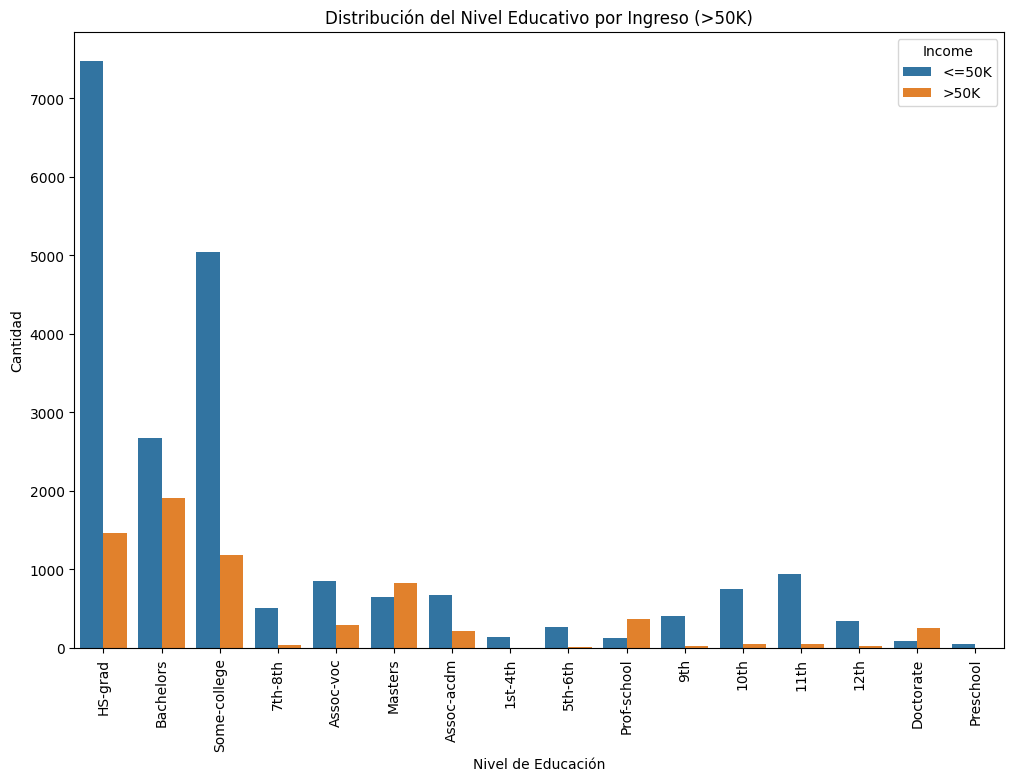

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train, x='education', hue='income')

# Configurar el gráfico para una mejor visualización
plt.title('Distribución del Nivel Educativo por Ingreso (>50K)')
plt.xlabel('Nivel de Educación')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.legend(title='Income')
plt.show()

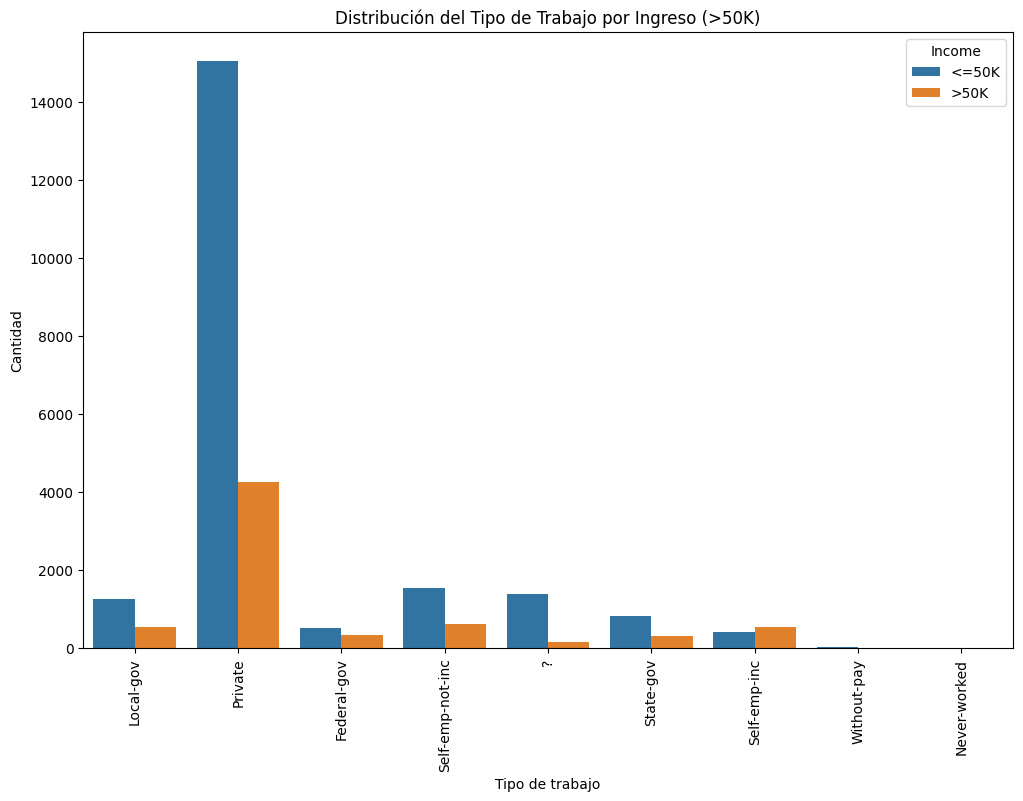

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train, x='workclass', hue='income')

# Configurar el gráfico para una mejor visualización
plt.title('Distribución del Tipo de Trabajo por Ingreso (>50K)')
plt.xlabel('Tipo de trabajo')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.legend(title='Income')
plt.show()

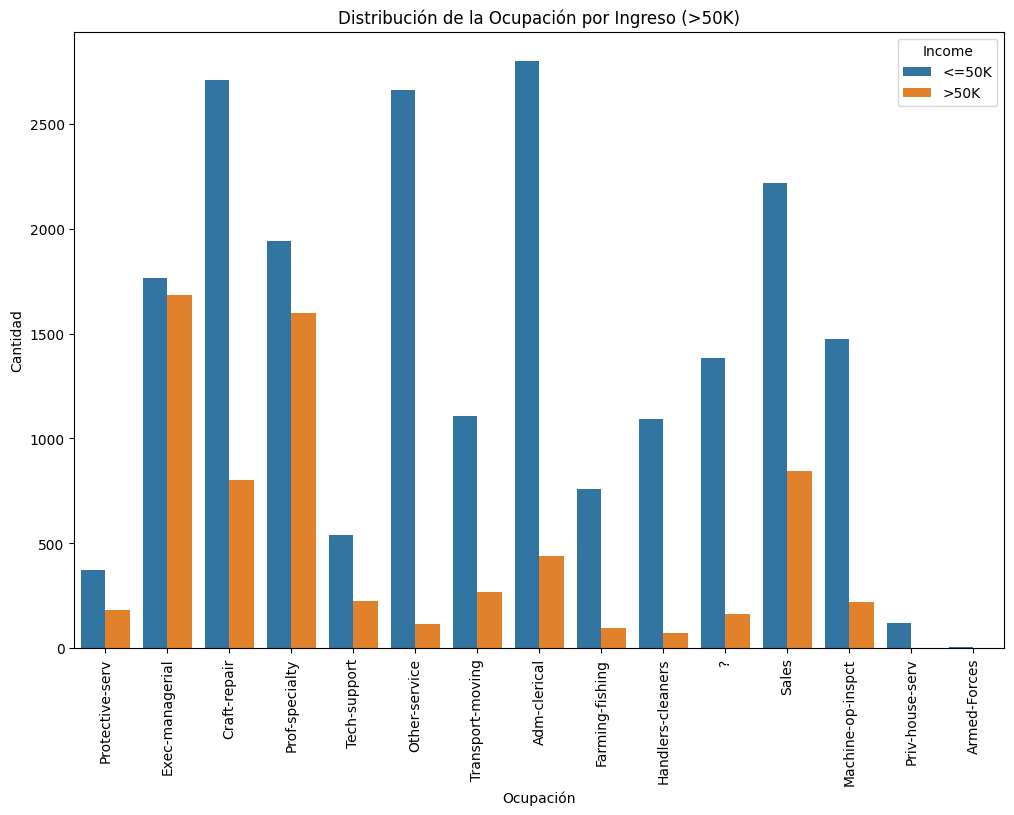

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train, x='occupation', hue='income')

# Configurar el gráfico para una mejor visualización
plt.title('Distribución de la Ocupación por Ingreso (>50K)')
plt.xlabel('Ocupación')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.legend(title='Income')
plt.show()

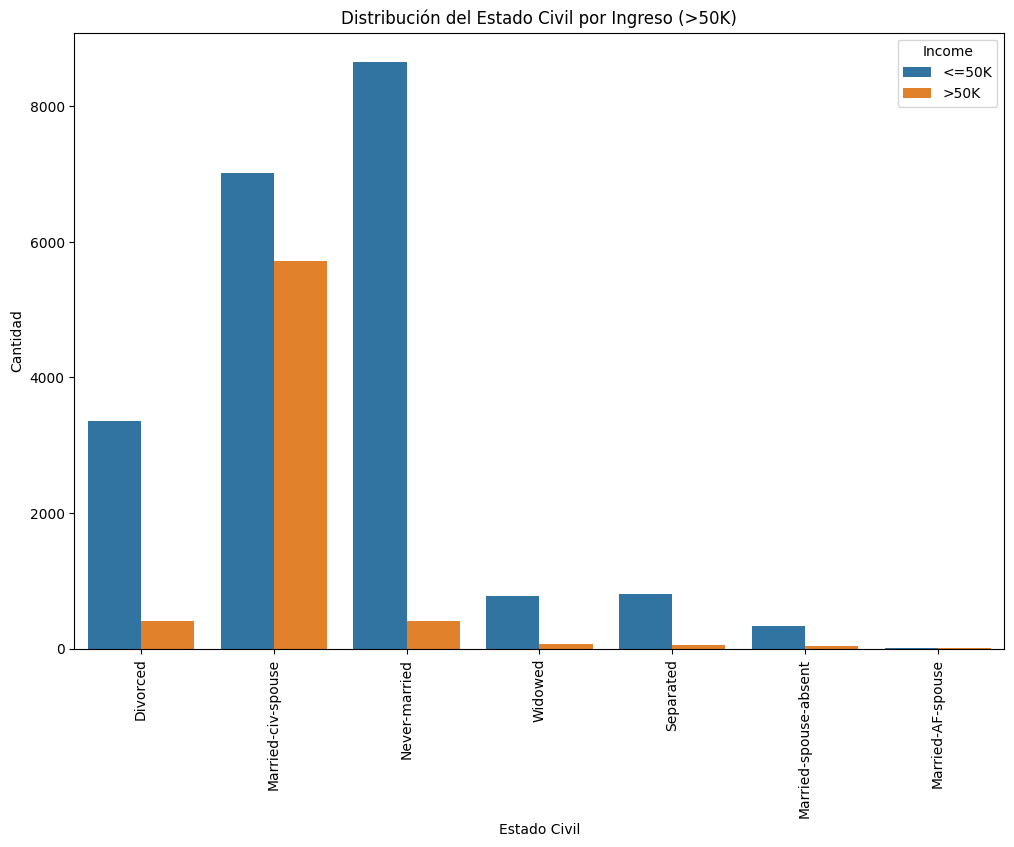

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train, x='marital.status', hue='income')

# Configurar el gráfico para una mejor visualización
plt.title('Distribución del Estado Civil por Ingreso (>50K)')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.legend(title='Income')
plt.show()

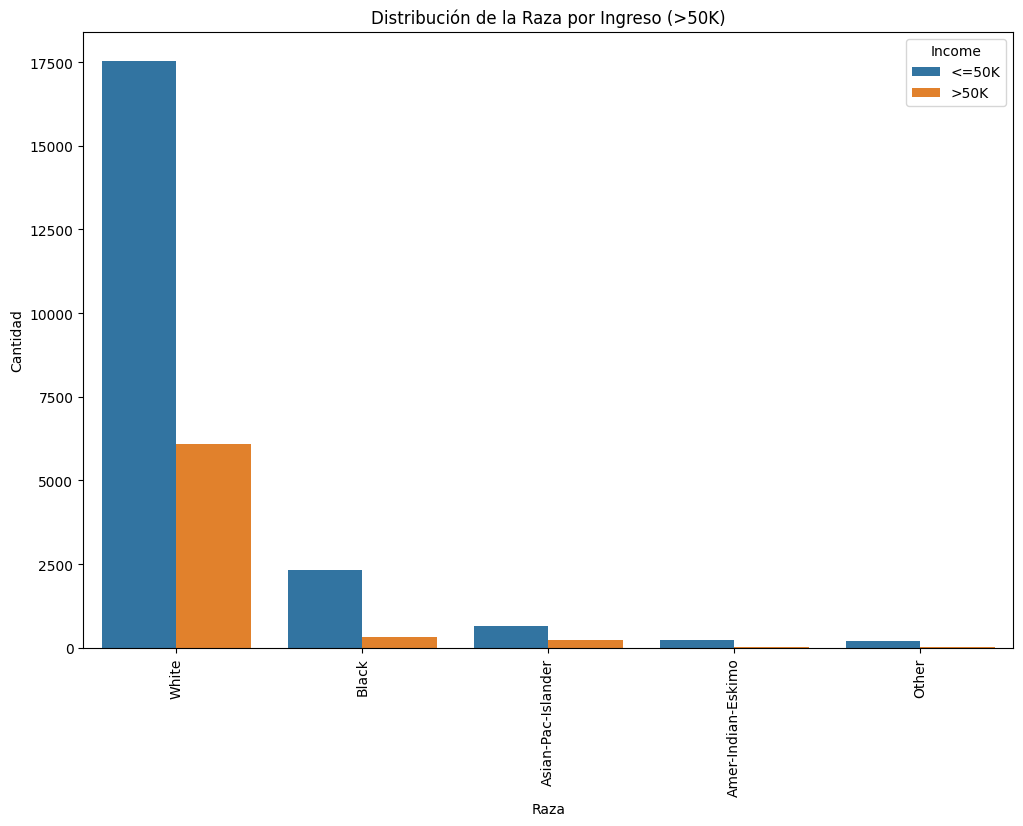

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train, x='race', hue='income')

# Configurar el gráfico para una mejor visualización
plt.title('Distribución de la Raza por Ingreso (>50K)')
plt.xlabel('Raza')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.legend(title='Income')
plt.show()

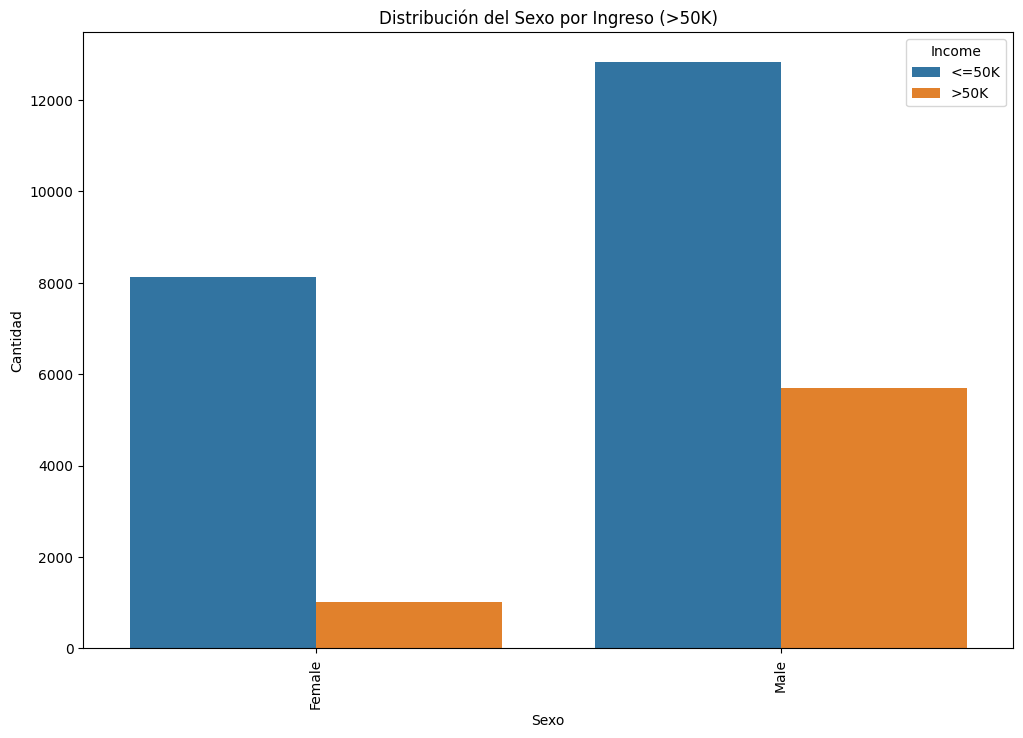

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train, x='sex', hue='income')

# Configurar el gráfico para una mejor visualización
plt.title('Distribución del Sexo por Ingreso (>50K)')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.legend(title='Income')
plt.show()

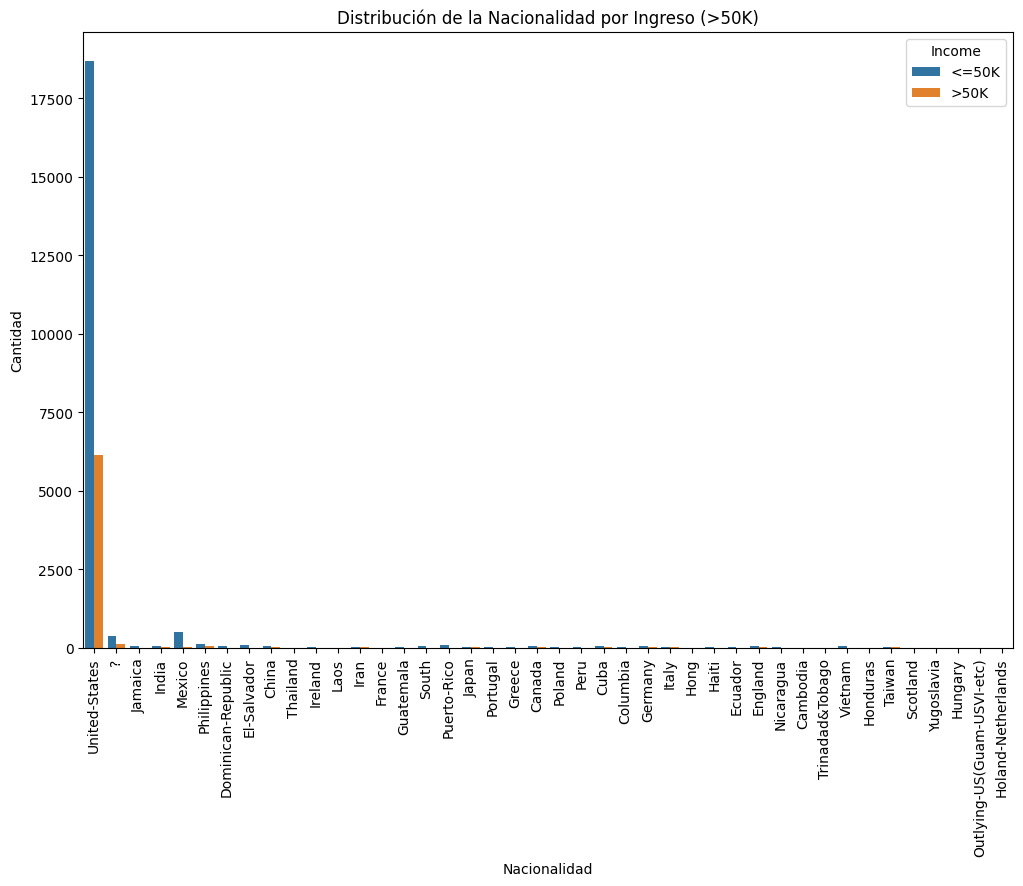

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train, x='native.country', hue='income')

# Configurar el gráfico para una mejor visualización
plt.title('Distribución de la Nacionalidad por Ingreso (>50K)')
plt.xlabel('Nacionalidad')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.legend(title='Income')
plt.show()

<ipython-input-44-a7ef74363927>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train["capital.loss"],bins=20)


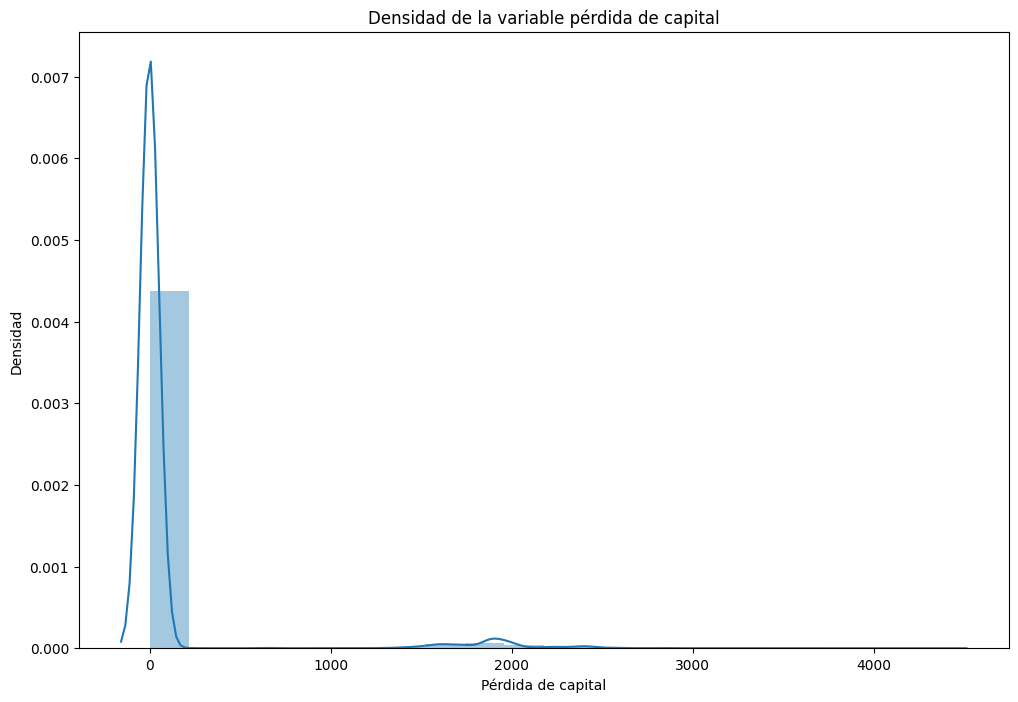

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a=train["capital.loss"],bins=20)

# Configurar el gráfico para una mejor visualización
plt.title('Densidad de la variable pérdida de capital')
plt.xlabel('Pérdida de capital')
plt.ylabel('Densidad')
plt.show()

<ipython-input-45-1615f4632ea8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train["capital.gain"],bins=20)


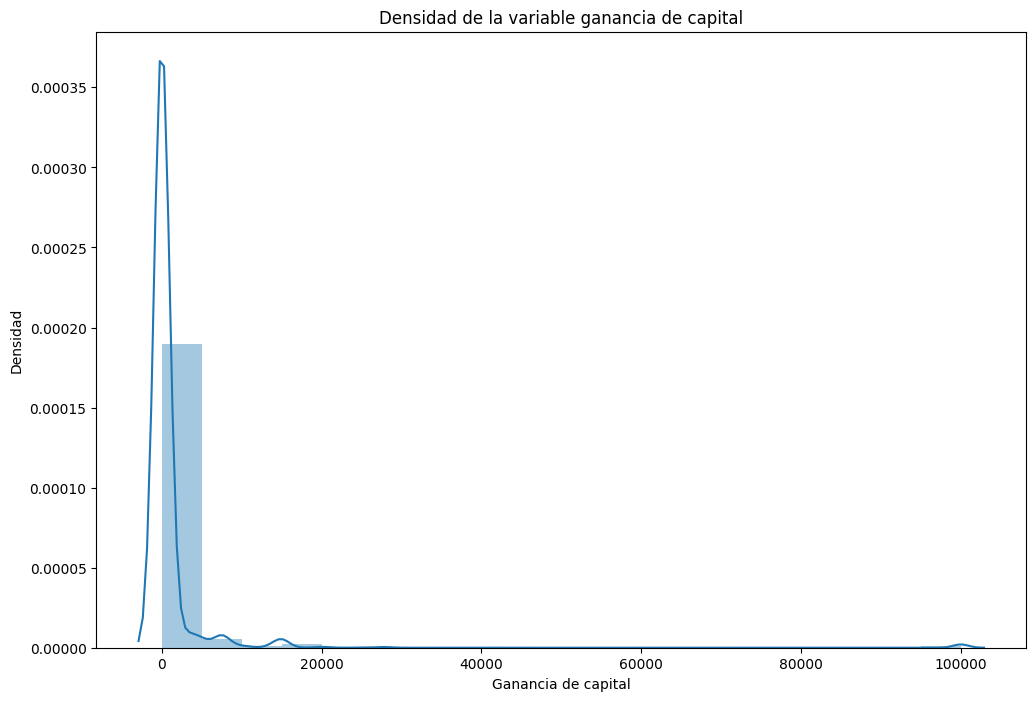

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a=train["capital.gain"],bins=20)

# Configurar el gráfico para una mejor visualización
plt.title('Densidad de la variable ganancia de capital')
plt.xlabel('Ganancia de capital')
plt.ylabel('Densidad')
plt.show()

<ipython-input-46-399e4e176dbd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train["hours.per.week"],bins=20)


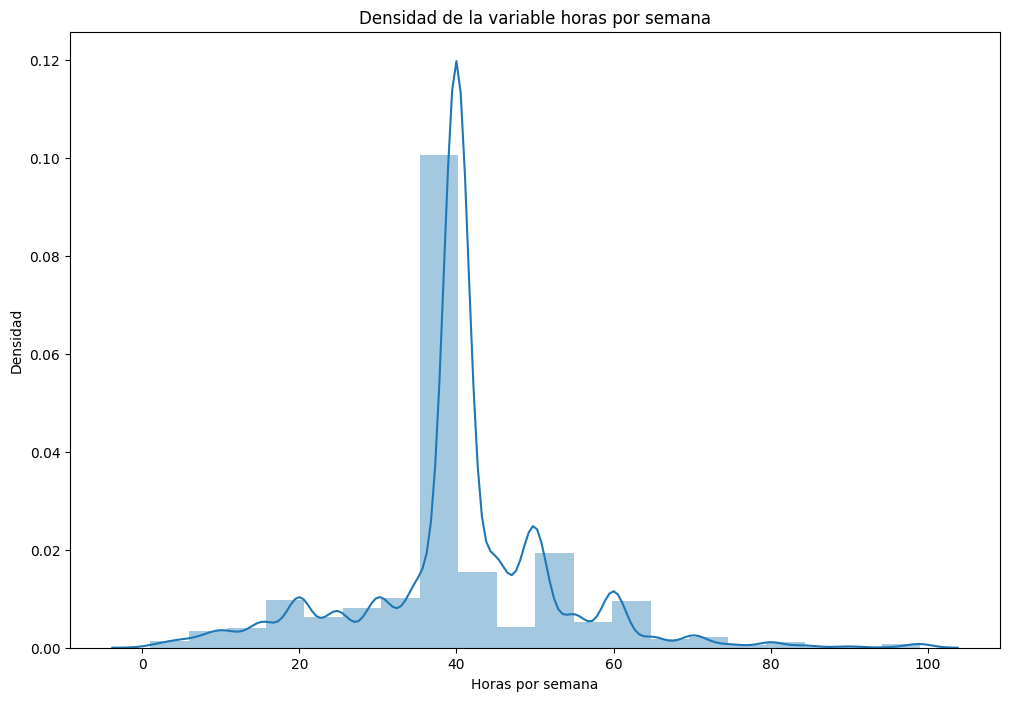

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a=train["hours.per.week"],bins=20)

# Configurar el gráfico para una mejor visualización
plt.title('Densidad de la variable horas por semana')
plt.xlabel('Horas por semana')
plt.ylabel('Densidad')
plt.show()

<ipython-input-47-1938a08977f5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train["age"],bins=20)


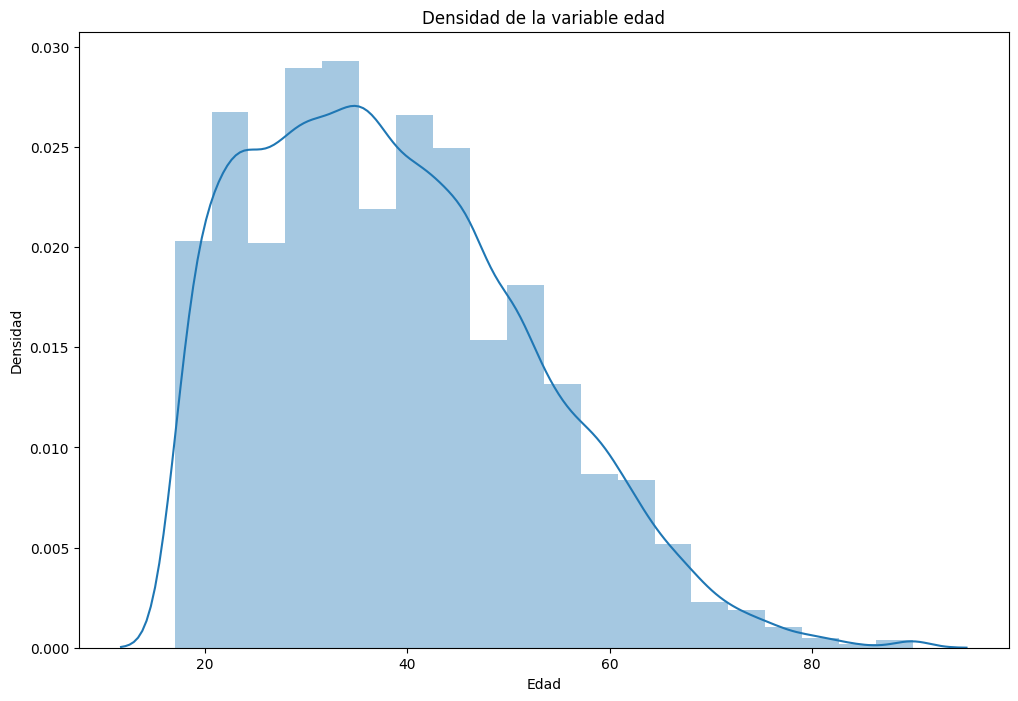

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a=train["age"],bins=20)

# Configurar el gráfico para una mejor visualización
plt.title('Densidad de la variable edad')
plt.xlabel("Edad")
plt.ylabel('Densidad')
plt.show()

# CONCLUSIONES#

En base al analisis de los dataframe observados podemos concluir que:


1.   Tanto la columna "capital.loss" como "capital.gain" no nos aportan informacion relevante por el faltante de datos, por lo que esos datos serán eliminados del modelo.
2.   La columna "education" y education.num" contiene los mismos datos, por lo que se usará solo una de estas columnas para realizar el modelo, la otra se eliminará.
3.   Vemos que en la columna "native.country" prebalece la nacionalidad Estadounidense, y el resto de nacionalidades aportan pocos datos como para concluir en un modelo, se agruparán las demas nacionalidades en el valor "Other".
4.   Vemos en las columnas "occupation" y "workclass" valores que no sabemos a que pertenecen, pero su cantidad es relevante, por lo tanto se decide cambiar "?" por "Other-service".
5.   La columna "age" parece estar sesgada hacia la derecha por lo que podemos intuir que la mayoria de participantes estan en un rango de edad entre 18 y 60 años de edad. Se procede reemplazar los datos mayores a 65 años y los acotamos a esa edad.
6.   Acotamos los valores de la columna "hours.per.hour" mayores a 80 horas, ya que no aporta diferencia en el analisis, se reemplaza por 80 horas.
7.   Se engloban las filas que contengan los datos "Without-pay" y "Never-worked" de la columna "workclass" en "Other-service"
8.   Se engloban los datos "Priv-house-serv" y "Armed-Forces" de la columna "occupation" en "Other-service" por aportar poca información por si solos.
9.   Se engloban los datos "Married-AF-Spouse" y "Married-spouse-absent" de la columna "marital.status" en "Other".



# Comenzamos con la limpieza y acondicionamiento de datos de TRAIN

In [ ]:
#Copiamos el dataframe y nos ponemos a realizar la limpieza de datos que no vamos a utilizar para el modelo
train_clean = train.copy()
columns_to_replace = ['occupation', 'workclass']
for column in columns_to_replace:
    train_clean[column] = train_clean[column].replace('?', 'Other-service')


In [ ]:
#Convertimos los datos "Without-pay" y "Never-worked" en "Other-service"
train_clean['workclass'] = train_clean['workclass'].apply(lambda x: 'Other-service' if x in ['Without-pay', 'Never-worked'] else x)


In [ ]:
#Convertimos los datos "Married-AF-spouse" y "Married-spouse-absent" en "Other"
train_clean["marital.status"]= train_clean["marital.status"].apply(lambda x: "Other" if x in ["Married-AF-spouse","Married-spouse-absent"] else x)


In [ ]:
#Convertimos en Other-service a las ocupaciones que no aportan valor por si solas
train_clean['occupation'] = train_clean['occupation'].apply(lambda x: 'Other-service' if x in ['Priv-house-serv', 'Armed-Forces'] else x)

In [ ]:
#Recortamos los valores de edad hasta 65 años
train_clean['age'] = train_clean['age'].apply(lambda x: 65 if x > 65 else x)

In [ ]:
#Acotamos los valores mayores a 80 horas a ese mismo valor
train_clean['hours.per.week'] = train_clean['hours.per.week'].apply(lambda x: 80 if x > 80 else x)

In [ ]:
#Eliminamos columnas no deseadas para el modelo
train_clean = train_clean.drop(columns=['capital.gain', 'capital.loss',"education","ID","index"])

In [ ]:
#Eliminamos columnas que no representan peso en la prediccion
#train_clean = train_clean.drop(columns=["race","native.country"])

In [ ]:
#Verificamos que los valores "?" se hayan sobreescrito
train_clean.occupation.value_counts()

occupation
Other-service        4447
Prof-specialty       3539
Craft-repair         3509
Exec-managerial      3450
Adm-clerical         3237
Sales                3065
Machine-op-inspct    1692
Transport-moving     1378
Handlers-cleaners    1162
Farming-fishing       853
Tech-support          767
Protective-serv       557
Name: count, dtype: int64

In [ ]:
#Agrupamos los valores de nacionalidades que no sean United-States y la transformamos en Others
train_clean['native.country'] = train_clean['native.country'].apply(lambda x: 'Other' if x != 'United-States' else x)
print(train_clean['native.country'].value_counts(normalize=1)*100)

native.country
United-States    89.712901
Other            10.287099
Name: proportion, dtype: float64


In [ ]:
#Abrimos las columnas para el entrenamiento del modelo
train_clean = pd.get_dummies(train_clean, columns=['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country'], drop_first=True)
#train_clean = pd.get_dummies(train_clean, columns=['workclass', 'marital.status', 'occupation', 'relationship', 'sex'], drop_first=True)

# Comenzamos con la limpieza y acondicionamiento de datos de TEST

In [ ]:
#Copiamos el dataframe y nos ponemos a realizar la limpieza de datos que no vamos a utilizar para el modelo
test_clean = testeo.copy()
columns_to_replace = ['occupation', 'workclass']
for column in columns_to_replace:
    test_clean[column] = test_clean[column].replace('?', 'Other-service')


In [ ]:
#Convertimos los datos "Without-pay" y "Never-worked" en "Others"
test_clean['workclass'] = test_clean['workclass'].apply(lambda x: 'Other-service' if x in ['Without-pay', 'Never-worked'] else x)

In [ ]:
#Convertimos los datos "Married-AF-spouse" y "Married-spouse-absent" en "Others"
test_clean["marital.status"]= test_clean["marital.status"].apply(lambda x: "Other" if x in ["Married-AF-spouse","Married-spouse-absent"] else x)

In [ ]:
#Convertimos en Others a las ocupaciones que no aportan valor por si solas
test_clean['occupation'] = test_clean['occupation'].apply(lambda x: 'Other-service' if x in ['Priv-house-serv', 'Armed-Forces'] else x)

In [ ]:
#Recortamos los valores de edad hasta 65 años
test_clean['age'] = test_clean['age'].apply(lambda x: 65 if x > 65 else x)

In [ ]:
#Acotamos los valores mayores a 80 horas a ese mismo valor
test_clean['hours.per.week'] = test_clean['hours.per.week'].apply(lambda x: 80 if x > 80 else x)

In [ ]:
#Eliminamos columnas no deseadas para el modelo
test_clean = test_clean.drop(columns=['capital.gain', 'capital.loss',"education","ID","index"])

In [ ]:
#Eliminamos columnas que no representan peso en la prediccion
#test_clean = test_clean.drop(columns=["race","native.country"])

In [ ]:
#Verificamos que los valores "?" se hayan sobreescrito
test_clean.occupation.value_counts()

occupation
Other-service        843
Exec-managerial      615
Prof-specialty       597
Craft-repair         585
Sales                585
Adm-clerical         531
Machine-op-inspct    308
Transport-moving     219
Handlers-cleaners    207
Tech-support         160
Farming-fishing      139
Protective-serv       92
Name: count, dtype: int64

In [ ]:
#Agrupamos los valores de nacionalidades que no sean United-States y la transformamos en Others
test_clean['native.country'] = test_clean['native.country'].apply(lambda x: 'Other' if x != 'United-States' else x)
print(test_clean['native.country'].value_counts(normalize=1)*100)

native.country
United-States    88.957181
Other            11.042819
Name: proportion, dtype: float64


In [ ]:
test_clean

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country
0,53,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States
1,18,Other-service,7,Never-married,Other-service,Own-child,White,Male,25,United-States
2,42,Private,10,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,37,United-States
3,49,Self-emp-inc,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,60,United-States
4,58,Local-gov,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,40,United-States
...,...,...,...,...,...,...,...,...,...,...
4876,50,Private,9,Divorced,Craft-repair,Unmarried,White,Female,40,United-States
4877,43,State-gov,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States
4878,65,Private,11,Never-married,Adm-clerical,Not-in-family,White,Female,40,United-States
4879,20,Private,10,Never-married,Adm-clerical,Own-child,White,Male,40,Other


In [ ]:
#Abrimos las columnas para el probar el modelo
test_clean = pd.get_dummies(test_clean, columns=['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country'], drop_first=True)

# Separamos la columna objetivo del resto de datos y dividimos el dataframe en dos conjuntos: uno para entrenamiento y el otro para testeo

In [ ]:
#Separamos columna objetivo del resto del dataframe
X = train_clean.drop('income', axis=1)
y = train_clean['income']

In [ ]:
# Convertir los valores de 'income' a 1 si es 'MAYOR A 50K' y 0 si es 'MENOR A 50K'
y = y.apply(lambda x: 1 if x == '>50K' else 0)

In [ ]:
#Separamos los datos 80% para entrenamiento y 20% para testeo
#Se ajusta mejor a la cantidad de datos del df testeo que contiene 4881 filas
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

In [ ]:
#Verificamos que los datos se separaran de forma correcta
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((22124, 36), (22124,), (5532, 36), (5532,))

# Entrenamiento de los datos mediante varios tipos de modelo
Propones 3 modelos de predicción

*   RandomForestClassifier
*   DecisionTreeClassifier
*   LogisticRegression

Elegimos para todos un valor de random_state igual para comparar resultados





In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Random Forest Classifier
# Entrenar el modelo Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=13,max_depth=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)

# Evaluar el rendimiento del modelo rf
print('Accuracy:', accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))


Accuracy: 0.8465919363587054
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     16762
           1       0.77      0.52      0.62      5362

    accuracy                           0.85     22124
   macro avg       0.82      0.74      0.76     22124
weighted avg       0.84      0.85      0.84     22124



In [ ]:
# Random Forest Classifier
# Predecir en el conjunto de prueba
y_pred = rf.predict(X_test)

# Evaluar el rendimiento del modelo
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.838937093275488
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4191
           1       0.75      0.51      0.60      1341

    accuracy                           0.84      5532
   macro avg       0.80      0.73      0.75      5532
weighted avg       0.83      0.84      0.83      5532



In [ ]:
# Decision Tree Classifier
# Entrenar el modelo Decision Tree
tree = DecisionTreeClassifier(max_depth = 10, random_state=13)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_train)

# Evaluar el modelo tree
print(f"Accuracy: {accuracy_score(y_train, y_pred)}")
print(classification_report(y_train, y_pred))

Accuracy: 0.8543210992587236
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     16762
           1       0.72      0.65      0.68      5362

    accuracy                           0.85     22124
   macro avg       0.81      0.78      0.79     22124
weighted avg       0.85      0.85      0.85     22124



In [ ]:
# Decision Tree Classifier
# Predecir en el conjunto de prueba
y_pred = tree.predict(X_test)

# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8223065798987708
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4191
           1       0.64      0.60      0.62      1341

    accuracy                           0.82      5532
   macro avg       0.76      0.75      0.75      5532
weighted avg       0.82      0.82      0.82      5532



In [ ]:
# Logistic Regression
# Entrenar el modelo "model"
model = LogisticRegression(max_iter=1500,random_state=13)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_train)

# Evaluar el modelo "model"
print(f"Accuracy: {accuracy_score(y_train, y_pred)}")
print(classification_report(y_train, y_pred))

Accuracy: 0.8342975953715422
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     16762
           1       0.70      0.56      0.62      5362

    accuracy                           0.83     22124
   macro avg       0.78      0.74      0.76     22124
weighted avg       0.83      0.83      0.83     22124



In [ ]:
# Logistic Regression
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8362255965292842
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4191
           1       0.69      0.59      0.63      1341

    accuracy                           0.84      5532
   macro avg       0.78      0.75      0.76      5532
weighted avg       0.83      0.84      0.83      5532



# ELEGIMOS EL MODELO PARA PROBAR EL NUEVO CONJUNTO DE DATOS DEL DF TESTEO

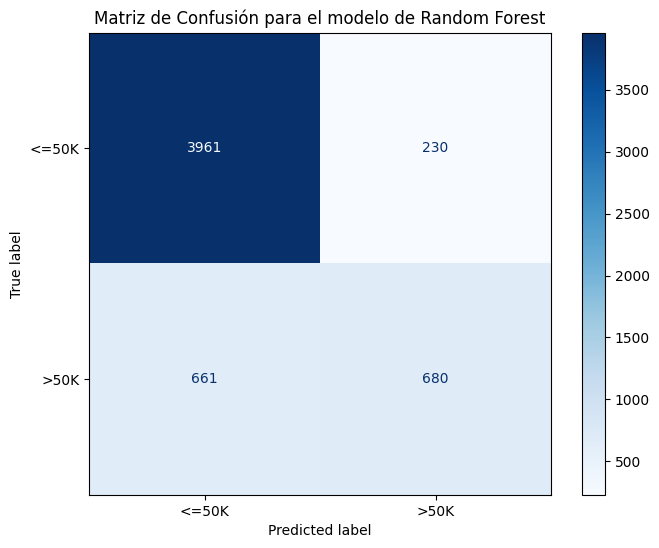

In [ ]:
#Elegimos el estimador Random Forest Classifier
#Imprimimos la matriz de confusión para revisar los resultados de predicción
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predecir en el conjunto de validación con el mejor modelo
y_pred_rf = rf.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])

# Visualizar la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 6))
cmd.plot(ax=ax, cmap='Blues')
plt.title('Matriz de Confusión para el modelo de Random Forest')
plt.show()

In [ ]:
#Pesos en la prediccion por columnas
peso_tree = tree.feature_importances_

In [ ]:
#Pesos en la prediccion por columnas
peso_rf = rf.feature_importances_

In [ ]:
columnas=X_train.columns

In [ ]:
# Realizamos una comparativa entre los pesos de las columnas en el estimador Random Forest y Decision Tree
pesos_por_columnas = pd.DataFrame({'columnas': columnas, 'peso_tree': peso_tree,'peso_rf': peso_rf})
pesos_por_columnas

,columnas,peso_tree,peso_rf
0,age,0.104433,0.106861
1,education.num,0.265177,0.196806
2,hours.per.week,0.074194,0.070998
3,workclass_Local-gov,0.001861,0.003094
4,workclass_Other-service,0.002026,0.001970
5,workclass_Private,0.002365,0.005374
6,workclass_Self-emp-inc,0.003481,0.008934
7,workclass_Self-emp-not-inc,0.014316,0.008599
8,workclass_State-gov,0.002118,0.002544
9,marital.status_Married-civ-spouse,0.424343,0.239433


In [ ]:
#Buscamos los mejores hiperparametros para el estimador seleccionado
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':[10,11,12], 'n_estimators':[100,110,120]}

grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, verbose=4, cv=3)

grid.fit(X, y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ....max_depth=10, n_estimators=100;, score=0.828 total time=   3.0s
[CV 2/3] END ....max_depth=10, n_estimators=100;, score=0.836 total time=   3.0s
[CV 3/3] END ....max_depth=10, n_estimators=100;, score=0.834 total time=   2.5s
[CV 1/3] END ....max_depth=10, n_estimators=110;, score=0.831 total time=   4.3s
[CV 2/3] END ....max_depth=10, n_estimators=110;, score=0.836 total time=   2.7s
[CV 3/3] END ....max_depth=10, n_estimators=110;, score=0.834 total time=   3.3s
[CV 1/3] END ....max_depth=10, n_estimators=120;, score=0.829 total time=   2.8s
[CV 2/3] END ....max_depth=10, n_estimators=120;, score=0.838 total time=   4.7s
[CV 3/3] END ....max_depth=10, n_estimators=120;, score=0.835 total time=   2.2s
[CV 1/3] END ....max_depth=11, n_estimators=100;, score=0.830 total time=   1.3s
[CV 2/3] END ....max_depth=11, n_estimators=100;, score=0.835 total time=   1.3s
[CV 3/3] END ....max_depth=11, n_estimators=100;,

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 11, 12],
                         'n_estimators': [100, 110, 120]},
             verbose=4)

In [ ]:
grid.best_params_

{'max_depth': 12, 'n_estimators': 120}

In [ ]:
grid.best_score_

0.8360573544219387

In [ ]:
# Random Forest Classifier
# Entrenar el modelo Random Forest con los mejores hiperparametros
rf = RandomForestClassifier(max_depth=12, n_estimators=120,random_state=13)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)

# Evaluar el rendimiento del modelo rf
print('Accuracy:', accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

Accuracy: 0.8629542578195625
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     16762
           1       0.79      0.59      0.68      5362

    accuracy                           0.86     22124
   macro avg       0.83      0.77      0.79     22124
weighted avg       0.86      0.86      0.86     22124



In [ ]:
# Random Forest Classifier
# Predecir en el conjunto de prueba con el modelo ajustado con mejores hiperparametros
y_pred = rf.predict(X_test)

# Evaluar el rendimiento del modelo
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8400216919739696
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4191
           1       0.73      0.54      0.62      1341

    accuracy                           0.84      5532
   macro avg       0.80      0.74      0.76      5532
weighted avg       0.83      0.84      0.83      5532



In [ ]:
#Se elige el modelo Random Forest Classifier por ser el que mejor se ajusta entre prediccion de entrenamiento y testeo
#Corremos el modelo y generamos el archivo .csv con los valores de ID y predicción
test_rf = rf.predict(test_clean)
prediccion_rf = pd.DataFrame({'ID': submit['ID'], 'PRED': test_rf})
prediccion_rf.to_csv('prediccion_grupo1.csv', index=False)

In [ ]:
prediccion_rf

,ID,PRED
0,3643,0
1,16036,0
2,9401,0
3,17903,1
4,5198,1
...,...,...
4876,19468,0
4877,7554,1
4878,25076,0
4879,9731,0


In [ ]:
prediccion_rf["PRED"].value_counts(normalize=1)*100

PRED
0    83.118213
1    16.881787
Name: proportion, dtype: float64

# Conclusiones Finales
- De los datos aportados por el archivo test.csv podemos observar que las predicciones apuntan a que el 83% de las personas cobran un sueldo anual menor a 50K y un 17% cobran un sueldo anual mayor a 50K, lo cual se ajusta a los datos de predicción aportados desde el archivo train.csv con un margen similar.
- Como dato adicional las variables que aportan mayor peso en las predicciones son: estado civil (particularmente los que se encotraban casados por civil y los que nunca se casaron), educación, edad, horas por semana y ocupación.
- Las variables que no generan un aporte a las predicciones son la nacionalidad y la raza.

En cuanto al rendimiento del modelo, si bien se intentó mejorarlo, se llegó a un límite. Probablemente esto se deba a la ingeniería de datos. Por ejemplo:
- Un factor muy influyente en el salario es la antigüedad en el ejercicio de la profesión y la performance (junior, semi-senior, senior, etc.), que no necesariamente tiene que ver con la edad.
- Además de la ocupación en sí, es importante el rubro de la empresa en la cual se desempeña (turismo, minería, IT, etc.).
- Más allá del título que posea la persona, las habilidades tienen  mucho peso en el salario (por ejemplo, manejo de algún software, idiomas, habilidades de gestión).
- Además del estado civil, la composición familiar puede tener mucha influencia, ya que va a condicionar el nivel de ingreso necesario.

Por todo ello, es difícil pedirle precisión al modelo cuando faltan datos relevantes para poder realizar una mejor predicción.


